# Sampling to evaluate $P(\mathbf{y}_t \, | \, \mathbf{r}_t, S_t)$
Recall that we assume that we are recording from $N$ neurons, and that we observe $K(t) = K$ marks in a time window $(t-1, t]$.

__Goal:__ For the forward-backward algorithm, we need to be able to evaluate $b_j(\mathbf{y}_t) \equiv P(\mathbf{y}_t \, | \, \mathbf{r}_t , S_t=j) = P\bigl( (m_k)_{k=1}^{K(t)} \, \big| \, \mathbf{r}_t^{(j)}; \{\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \}_{n=1}^N \bigr) = \mathcal{L}\bigl(\mathbf{r}_t^{(j)} \, \big| \, ( m_k )_{k=1}^{K(t)}; \{\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \}_{n=1}^N \bigr)$.

Dropping the dependence of $K$ on $t$ (purely for notational simplicity), and using the shorthand $\mathbf{r}_t^{(j)}$ to mean $\mathbf{r}_t \, | \, S_t=j$, and dopping the explicit parametereization of $P(\cdot)$ by $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$, we note that we desire to evaluate 
\begin{equation}
P_{\mathbf{y}_t, | \mathbf{r}_t^{(j)}} \bigl( (m_k)_{k=1}^{K} \, \big| \,\mathbf{r}_t^{(j)} \bigr).
\end{equation}

We can introduce the auxiliary hidden random variable $\mathbb{1}^K \in \mathbb{Z}^{N \times K}$, where each column of $\mathbb{1}^K$ is a standard unit vector $\mathbf{e}_n$ whose elements are all zeros, except for the $n$th element, which is equal to one. That is, the $k$th column encodes the neuron identity $n$ that generated the $k$th mark. We denote this as $\mathbb{1}^K \equiv \bigl(\mathbf{e}_{u(k)} \bigr)_{k=1}^K$, such that $u(k)\in \mathbb{Z}$ is the neuron identity of the $k$th mark.

Now clearly,
\begin{equation}
P_{\mathbf{y}_t, | \mathbf{r}_t^{(j)}} \bigl( (m_k)_{k=1}^{K} \, \big| \,\mathbf{r}_t^{(j)} \bigr) = \int_{\mathbb{1}^K}\, P_{\mathbf{y}_t, \mathbb{1}^K | \mathbf{r}_t^{(j)}} \bigl( (m_k)_{k=1}^{K}, \mathbb{1}^K \, \big| \,\mathbf{r}_t^{(j)} \bigr) \, \text{d}\mathbb{1}^K
\end{equation}

Recall that
\begin{equation}
P_{\mathbf{y}_t, \mathbb{1}^K | S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}, \mathbb{1}^K  \, \big| \, S_t, \mathbf{r}_t \bigr) = P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) \cdot P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t)
\end{equation}
so that
\begin{equation}
\int_{\mathbb{1}^K} \, P_{\mathbf{y}_t, \mathbb{1}^K | S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}, \mathbb{1}^K  \, \big| \, S_t, \mathbf{r}_t \bigr) \, \text{d}\mathbb{1}^K = \int_{\mathbb{1}^K} \, P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) \cdot P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t) \, \text{d}\mathbb{1}^K
\end{equation}
and
\begin{equation}
\text{LHS} = \int_{\mathbb{1}^K} \, P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) \cdot P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t) \, \text{d}\mathbb{1}^K = \mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t} \bigl[ P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) \bigr] = \text{RHS}
\end{equation}
Further, note that
\begin{equation}
P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) = P_{\mathbf{y}_t | \mathbb{1}^K} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K\bigr) = \prod_{k=1}^K \mathcal{N} \bigl(m_k; \boldsymbol{\mu}_{u(k)}, \boldsymbol{\Sigma}_{u(k)}\bigr)
\end{equation}
and that
\begin{equation}
P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t) = \prod_{n=1}^N \text{Pois}\bigl(V_n; r_t^n\bigr) \quad \bigl[\text{that is}, V_n \, | \, r_t^n \sim \text{Pois}(r_t^n) \quad \text{s.t.}~\sum_{n=1}^N V_n = K\bigr]
\end{equation}
where
\begin{equation}
V_n = \sum_{k=1}^K\bigl(u(k)=n\bigr), \quad n=1,2,\ldots, N
\end{equation}


Note that it is generally difficult to compute the integral (LHS) directly, whereas it is simpler to estimate the expected value (RHS), assuming of course, that we can sample from $\mathbb{1}^K\, |\, S_t, \mathbf{r}_t$ according to it's distribution.

Indeed, if we are able to sample $\mathbf{W}_i \sim P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t)$, where $\mathbf{W}_i \in \mathbb{Z}^{N \times K}$ for $i=1,\ldots, M$, then
\begin{align}
P_{\mathbf{y}_t, | S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K} \, \big| \, S_t, \mathbf{r}_t \bigr) &= \mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t} \bigl[ P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) \bigr]\\ &\approx \dfrac{1}{M} \sum_{i=1}^M P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K=\mathbf{W}_i, S_t, \mathbf{r}_t  \bigr) \\
&= \dfrac{1}{M}\sum_{i=1}^M P_{\mathbf{y}_t | \mathbf{W}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbf{W}_i\bigr) \nonumber \\
&= \dfrac{1}{M} \sum_{i=1}^M\prod_{k=1}^K \mathcal{N}\bigl(m_k; \boldsymbol{\mu}(\mathbf{w}_k^{(i)}), \boldsymbol{\Sigma}(\mathbf{w}_k^{(i)}) \bigr)
\end{align}
so that the data log likelihood can be approximated as follows:
\begin{equation}
\log  \Bigl[ P_{\mathbf{y}_t, | S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K} \, \big| \, S_t, \mathbf{r}_t \bigr) \Bigr] \approx \log \Biggl[ \sum_{i=1}^M \exp \Biggl( \sum_{k=1}^K \log \Bigl( \mathcal{N}\bigl(m_k; \boldsymbol{\mu}(\mathbf{w}_k^{(i)}), \boldsymbol{\Sigma}(\mathbf{w}_k^{(i)}) \bigr) \Bigr) \Biggr) \Biggr] - \log (M)
\end{equation}
where, for each mark, $\boldsymbol{\mu}$ and $\boldsymbol{\Sigma}$ depend on the neuron identity encoded by $\mathbf{w}_k^{(i)}$, the $k$th column of the $i$th sample $\mathbf{W}_i$.

### __So how can we sample $\mathbf{W}_i$ according to it's underlying distribution?__

Sampling $\mathbf{W}_i$ isn't terribly difficult. Indeed, to sample from $N$ independent Poisson processes subject to the constraint COMPLETE ME

### __Updating the state-dependent firing rates, $\mathbf{r}_t^{(j)}$__

Ordinarily, we may consider updating the rates according to
\begin{equation}
\hat{r}_{t}^n \big|_{S_t=j} = \dfrac{\sum_{t=1}^T \gamma_j(t) V_n(t)}{\sum_{t=1}^T \gamma_j(t)}
\end{equation}
where $\sum_{t=1}^T \gamma_j(t)$ is the expected number of times that we are in state $j$ (or equivalently, the expected number of transitions away from state $j$; even more explicitly, $\gamma_j(t) = P(S_t=j\,|\, \mathbf{Y})$), and $V_n(t)$ is the number of marks in time window $t$ that were generated / emitted by neuron $n$. However, we do not know which marks were generated by which neurons, so we have to consider
\begin{equation}
\hat{r}_{t}^n \big|_{S_t=j} = \dfrac{\sum_{t=1}^T \gamma_j(t) \mathbb{E}\big[V_n(t)\bigr]}{\sum_{t=1}^T \gamma_j(t)}
\end{equation}
instead.

It turns out that we can efficiently compute this expectation, for time window $(t-1, t]$, as follows:
\begin{equation}
\mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t, (m_k)_{k=1}^K} \bigl[ \hat{V}_n(t) \bigr] = \dfrac{1}{K(t)} \sum_{k=1}^{K(t)} q_n^k(t)
\end{equation}
where
\begin{equation}
q_i^k (t) = \dfrac{\mathcal{N}\bigl(m_k^{(t)}; \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i \bigr)\cdot r_t^i}{\sum_{n=1}^N \mathcal{N}\bigl(m_k^{(t)}; \boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \bigr) \cdot r_t^n}, \quad i=1,2,\ldots, N,
\end{equation}
and where we have made the dependence on $t$ explicit.

Note that in the above, we actually computed the _normalized_ expectation of the relative firing rates. That is, $\sum_{n=1}^N \mathbb{E}\bigl[\hat{V}_n(t)\bigr] = 1$. This is generally not a problem, because we only need these relative firing rates during the E-step, or more generally in computing the forward-backward algorithm. In fact, it makes the evaluation of the HMM independent of the time window duration, which can be quite convenient at times.

---

How should we compute this expectation? Clearly we can't base it just on the firing rates, nor should we base it purely on the observed marks (why?).

(why?) Consider $N=2$ neurons, and $K=5$ marks, with our current best estimate for $\mathbf{r}_t^{(j)} = (1, 4)$. That is, we expect one mark from neuron one, and four marks from neuron two. If we observe five marks exactly equidistant from the two neurons (that is, $P(m_k \, | \, n=1) = P(m_k \, | \, n=2)$ for $k=1,\ldots,5$), then clearly our data can perfectly be described by our current firing rate estimate, and should not be changed. We did not see any evidence to update our expected rates! If we ignored the rates, and simply derived some expected value based on the mark probabilities, then our new rate estimate would be $\mathbf{r}_t^{(j)} = (2.5, 2.5)$. We can argue similarly that the new rate estimate should not be based purely on the rates, but should in fact incorporate the observed mark probabilities. __THIS SEEMS TO SUGGEST THAT WE CANNOT SIMPLY REUSE THE SAME SAMPLES OF $\mathbb{1}^K$ FROM THE E-STEP, SINCE THOSE WERE GENERATED INDEPENDENT OF THE MARKS__

So how exactly should we compute $\mathbb{E}\bigl[V_n(t) \bigr]$?

First, note that computing $\mathbb{E}\bigl[ \mathbf{V}(t) \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t \bigr]$ is equivalent to computing $\mathbb{E}\bigl[ \mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t \bigr]$, since $\mathbf{V}$ is a deterministic function of $\mathbb{1}^K$. Also note that we cannot compute the expectation for $V_n$ indepentent of the other $\{V_i\}, i\neq n$, since they are coupled by the constraint that $\sum_{n=1}^N V_n = K$.

From Bayes' theorem, we have
\begin{equation}
P\bigl(\mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t\bigr) = \dfrac{P\bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr) \cdot P\bigl(\mathbb{1}^K \, \big| \, S_t, \mathbf{r}_t\bigr)}{ P\bigl((m_k)_{k=1}^K \, \big| \, S_t, \mathbf{r}_t\bigr)}
\end{equation}
where each of the factors in the numerator is easily computable, and where the denominator is assumed known after estimating it for the forward-backward algorithm. So in principle, we could explicitly compute
\begin{equation}
\mathbb{E}\bigl[ \mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t \bigr] = \int_{\mathbb{1}^K}\, \mathbb{1}^K P\bigl(\mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t\bigr)\, \text{d} \mathbb{1}^K,
\end{equation}
but the space over which to integrate is prohibitively large.

Nevertheless, for sampling purposes,
\begin{equation}
P\bigl(\mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, S_t, \mathbf{r}_t\bigr) \propto P\bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr) \cdot P\bigl(\mathbb{1}^K \, \big| \, S_t, \mathbf{r}_t\bigr).
\end{equation}

The second factor, $P\bigl(\mathbb{1}^K \, \big| \, S_t, \mathbf{r}_t\bigr)$, gives us a way to sample $\mathbb{1}^K$ independent of the order of the marks, whereas the first factor, $P\bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr)$, roughly states thate we are more likely to have $\mathbb{1}^K$s for which the marks are matched (in other words, for which the marks are more likely). But how can we make this precise?

Our current idea is to sample $\mathbb{1}^K$ from $P(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t)$, similar to the E-step, but then to weigh those samples by $P\bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr)$. How does the weighting play out exactly? __And can we get something similar with the mixed multinomial approach?__



## Making sure things are correct

Recall the conditional expectation $\mathbb{E}_Y [ Y\, |\, X=x ] = \int_{-\infty}^\infty\, y \cdot f(y\, |\, x) \, \text{d}y$. It seems nonsensical to consider $\mathbb{E}_Y[Y=y\,|\, X]$, which simply equals $y$, because $Y$ has been fixed, independent of $X$. But what about $\mathbb{E}_X [ Y=y \, | \, X]$? This latter quantity also seems either nonsensical, or pathological. Luckily we don't have to worry about them too much, because we are interested in computing expectaitons of the form $\mathbb{E}_X[P(Y=y\, | \, X)]$, which is only superficially similar to $\mathbb{E}_X[Y=y \, | \, X]$. Nevertheless, I wanted to make doubly sure that $\mathbb{E}_X[P(Y=y\, | \, X)]$ is a reasonable thing to consider, and that I knew how to compute it$\ldots$

We want to compute things of the form $\mathbb{E}_X \bigl[ P(Y=y\, | \, X) \bigr]$. Note that $P(Y=y\, | \, X)$ is an $X$-measurable function, with $Y$ fixed to the value $y$. That is, $P(Y=y\, | \, X)$ is a random variable with sigma field $\sigma({X})$.

In this case, we have  

__Option A__
\begin{equation}
\mathbb{E}_X \bigl[ P(Y=y\, | \, X) \bigr] = \int_X P_{Y|X}(Y=y|X=x)\cdot P_X(x) \, \text{d}x
\end{equation}

__Option B__
\begin{equation}
\mathbb{E}_X \bigl[ P(Y=y\, | \, X) \bigr] = \int_X P_{Y|X}(Y=y|X=x)\cdot P_{X|Y}(x\, |\, y) \, \text{d}x
\end{equation}

I am confident that __Option A__ is correct. Indeed, $\int_Y \mathbb{E}_X \bigl[P(y \, | \, X)\bigr] \, \text{d}y = 1$, which is easy to prove using the linearity of Expectation, so that this implies that __Option A__ is indeed correct (not proven here).

Then our sampling strategy to approximate the expectation becomes
\begin{align}
x_i &\sim P_X, \quad i=1,\ldots, M \\
\mathbb{E}_X\bigl[ P(Y=y \, | \, X) \bigr] &\approx \dfrac{1}{M} \sum_{i=1}^M P(Y=y \, | \, x_i)
\end{align}

### So what?
The interesting implication from the above is that when we evaluate $P\bigl((m_k)_{k=1}^K \, \big| \, S_t, \mathbf{r}_t \bigr)$ by approximating $\mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t} \bigl[ P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) \bigr]$, we need to sample $\mathbb{1}^K | \mathbf{r}_t$, _independent_ from the observed marks (but amusingly, dependent on the _number_ of observed marks)!

# Implementation

Naive first, optimize later. But see https://stackoverflow.com/questions/14386822/fast-numpy-fancy-indexing, and https://medium.com/@TejasBob/being-efficient-with-numpy-part-1-2e13f783f41b, and maybe https://ipython-books.github.io/45-understanding-the-internals-of-numpy-to-avoid-unnecessary-array-copying/

In [2]:
import numpy as np

from scipy.stats import multivariate_normal
from scipy.special import logsumexp

def sample_IKR(r, *, K=None, N=None, M=None, mode='id'):
    """Sample I^K|R.
    
    Note that 1^K|R is called I^K|R because we cannot have variables
    that start with a number in Python.
    
    Parameters
    ----------
    r : array-like
        Relative rates of shape (N,) for current time window, and state
    K : int, optional
        Number of events to sample, default is one.
    N : int, optional
        Number of neurons, if not specified, will be obtained from R.
    M : int, optional
        Number of length-K samples to generate. Default is one.
    mode : str, optional
        String specifying output mode. Default is 'id'.
        Alternative is 'ek', which returns the sequence of vectors.
        
    Returns
    -------
    ikr : samples with shape (M, K) if mode=='id', and with shape (M, N, K)
        if mode=='ek'
        
    Example
    -------
    >>> r = [0.1, 0.4, 0.2]
    >>> ikr = sample_IKR(r=r, K=30, M=20, mode='id')

    """
    
    if K is None:
        K = 1
    if M is None:
        M = 1
    if N is None:
        N = len(r)
        
    p = r / np.sum(r) # only want to do this once!
    
    if mode == 'id':
        ikr = np.random.choice(a=N, size=K*M, p=p )
        ikr = np.reshape(ikr, (M, K))
    elif mode == 'ek':
        ikr = np.random.multinomial(n=1, pvals=p, size=K*M)
        ikr = np.reshape(ikr, (K, M, N)).transpose([1,2,0])
    else:
        raise ValueError("mode '{}' not understood.".format(mode))
           
    return ikr

def eval_mark_loglikelihoods(*, marks, ikr, mu, Sigma):
    """
    Compute P(Y=marks | I^K), where I^K ~ rates.
    
    Strategy: first pre-compute the NxK likelihood of observing
    each mark from every neuron. Then use this matrix to compute
    the rest.
    
    Parameters
    ----------
    marks : array-like, with shape (K, D)
        Observed marks, with shape (K, D), where D is the dimensionality
        of the mark space, and K is the number of observed marks.
        
    ikr : array-like, with shape (M, K)
        Sampled neuron IDs for each sample, and each mark.        
    mu : array-like, with shape (N, D)
        D-dimensional means for each of the N neurons.
    Sigma : array-like, with shape (N, D, D)
        D-by-D-dimensional covariances for each of the N neurons.
        
    Returns
    -------
    ll : log likelihoods for each sample. Shape (M,)
    """
    N = len(mu)
    M, K = ikr.shape
    
    logF = np.zeros((N, K))

    for nn in range(N):
        mvn = multivariate_normal(mean=mu[nn], cov=Sigma[nn])
        f = np.log(mvn.pdf(marks))
        logF[nn,:] = f

    ll = np.zeros(M)
    krange = np.arange(K)
    for ii in range(M):
        ll[ii] = np.sum(logF[ikr[ii], krange])
        
    return ll
    
def eval_P_Y_given_ISR(*, marks, r, mu, Sigma, M):
    """
    Appriximate P(Y=marks | r_t^{(j)}) by sampling I^K|R.
    
    We use logsumexp to make this numerically more stable.
    
    Parameters
    ----------
    marks : array-like, with shape (K, D)
        Observed marks, with shape (K, D), where D is the dimensionality
        of the mark space, and K is the number of observed marks.     
    r : array-like
        Relative rates of shape (N,) for current time window, and state       
    mu : array-like, with shape (N, D)
        D-dimensional means for each of the N neurons.
    Sigma : array-like, with shape (N, D, D)
        D-by-D-dimensional covariances for each of the N neurons.
        
    Returns
    -------
    logP : log probability of observing sequence of marks
    
    """
    K = len(marks)
    
    ikr = sample_IKR(r=r,
                     K=K,
                     M=M,
                     mode='id')
    
    ll = eval_mark_loglikelihoods(marks=marks,
                                  ikr=ikr,
                                  mu=mu,
                                  Sigma=Sigma)
    
    logP = logsumexp(ll) - np.log(M)
    
    return logP

In [7]:
%%timeit
M = 1000
logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)

8.71 ms ± 528 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)


In [10]:
%%timeit
M = 10000
logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)

42.8 ms ± 430 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [11]:
%%timeit
M = 100000
logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)

425 ms ± 3.48 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [588]:
18000*0.15*30/60/60

22.5

In [571]:
# computational complexity:
# grows linear in M
# grows sublinear in K, but space quickly becomes undersampled, leading to a lower-than-expected logP (empirically); what about matching marks to IKR?
# grows very sub linear in N

# 30 minutes of data in 100 ms bins ==> T=18,000; 30 states
# Let's say we need 150 ms per eval (very conservative estimate w 10K samples)
# then we need 18,000 x 0.15 x 30 = 22 hrs per iteration

# we can parallelize over states and time bins, for an 8 to 12 x speed-up
# we can also consider using a GPU to increase M (not for me...)
# we can also re-use samples across time? truncating at K... since r_t^{(j)} is constant within one iteration of EM


18000.0

In [3]:
r = [0.1, 0.4, 0.2, 0.8]
M=2000

mu = np.array([[3, 2], [0,0], [-5,0], [-1, 2]])
N = len(r)
D = 2
Sigma = np.zeros((N, D, D))
for n in range(N):
    Sigma[n] = np.array([[1, 0], [0, 1]])
    
marks = np.array([[0,0], [0,1], [10,2], [-3,2], [0,0], [0,1], [10,2], [-3,2], [0,0], [0,1], [10,2], [-3,2], [0,0], [0,1], [10,2], [-3,2]])
# marks = np.array([[0,0], [0,1], [0,2], [-5,0]]) # 'better' marks

lp = []
for pp in range(100):
    logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)
    lp.append(logP)
    
M=10000
lp2 = []
for pp in range(100):
    logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)
    lp2.append(logP)

M=100000
lp3 = []
for pp in range(100):
    logP = eval_P_Y_given_ISR(marks=marks, r=r, mu=mu, Sigma=Sigma, M=M)
    lp3.append(logP)

In [8]:
r = [0.1, 0.4, 0.2, 0.8]
r = [0.1, 0.1, 0.1, 0.1]
M=2000000

mu = np.array([[3, 2], [0,0], [-5,0], [-1, 2]])
N = len(r)
D = 2
Sigma = np.zeros((N, D, D))
for n in range(N):
    Sigma[n] = np.array([[1, 0], [0, 1]])
    
marks = np.array([[0,0], [0,1], [0,2], [-5,0], [-2, -2]]) # 'better' marks

marks = np.array([[0,0], [0,0], [3,2], [0,0], [3, 2]]) # 'better' marks

K = len(marks)

In [9]:
def id_to_ek(ik, N):
    M, K = ik.shape
    ek = np.zeros((M, N, K))
    
    for mm in range(M):
        for kk in range(K):
            n = ikr[mm,kk]
            ek[mm, n, kk] = 1
        
    return ek
    
ikr = sample_IKR(r=r,
                 K=K,
                 M=M,
                 mode='id')
    
ll = eval_mark_loglikelihoods(marks=marks,
                                  ikr=ikr,
                                  mu=mu,
                                  Sigma=Sigma)

ekr = id_to_ek(ikr, N=N)

weighted_ekr = (np.log(ekr.T) + ll).T # problematic with binary vectors...
a = np.exp(logsumexp(weighted_ekr, axis=0) - np.log(M))
print(np.round(a/a.sum(axis=0)))
V = (a).sum(axis=1)
V=V/np.sum(V)
V

C:\Users\etien\Anaconda3\lib\site-packages\ipykernel_launcher.py:24: RuntimeWarning: divide by zero encountered in log


[[0. 0. 1. 0. 1.]
 [1. 1. 0. 1. 0.]
 [0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0.]]


array([3.96828713e-01, 5.19536599e-01, 9.24224714e-07, 8.36337632e-02])

In [10]:
# now attempt to get same rate estimate from multinomial sampling

In [14]:
logmnp = np.zeros((N,K))

logF = np.zeros((N, K))

for nn in range(N):
    mvn = multivariate_normal(mean=mu[nn], cov=Sigma[nn])
    f = np.log(mvn.pdf(marks))
    logF[nn,:] = f
    
den = logsumexp((logF.T + np.log(r)).T , axis=0)

for nn in range(N):
    for kk in range(K):
        logmnp[nn,kk] = logF[nn,kk] + np.log(r[nn]) - den[kk]
    
mnp = np.exp(logmnp)

vest = np.zeros(N)
for kk in range(K):
    vv = np.random.choice(N, size=M, p=mnp[:,kk])
    vest += np.histogram(vv, bins=np.arange(N+1))[0]
    
vest/np.sum(vest)

array([3.967504e-01, 5.175982e-01, 9.000000e-07, 8.565050e-02])

In [ ]:
# now attempt to compute the rate update without any sampling:

In [22]:
np.exp(logsumexp(logmnp, axis=1) - np.log(K))

array([3.96744665e-01, 5.17606241e-01, 9.60025883e-07, 8.56481333e-02])

In [428]:
M

2000000

/home/etienne/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'log $P((m)_k^K | \\mathbb{1}^K)$')

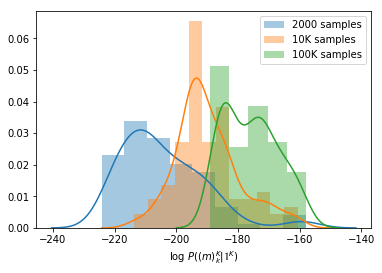

In [17]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.distplot(lp, label='2000 samples')
sns.distplot(lp2, label='10K samples')
sns.distplot(lp3, label='100K samples')
plt.legend()
plt.xlabel('log $P((m)_k^K | \mathbb{1}^K)$')

/home/etienne/anaconda3/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Text(0.5, 0, 'log $P((m)_k^K | \\mathbb{1}^K)$')

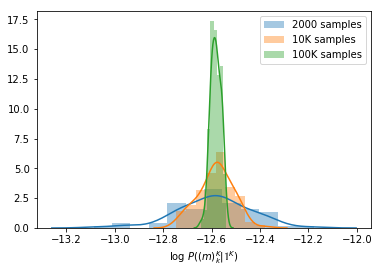

In [19]:
import matplotlib.pyplot as plt
sns.distplot(lp, label='2000 samples')
sns.distplot(lp2, label='10K samples')
sns.distplot(lp3, label='100K samples')
plt.legend()
plt.xlabel('log $P((m)_k^K | \mathbb{1}^K)$')

# OLD CONTENT BELOW; DO NOT TRUST!

Recall
\begin{equation}
f(y,x) = f(x) \cdot f(y|x).
\end{equation}

The marginal density of $Y$ can then be obtained from
\begin{equation}
f(y) = \int_{-\infty}^\infty\, f(x) \cdot f(y|x) \, \text{d}x.
\end{equation}

The conditional expectation is
\begin{equation}
\mathbb{E} [ Y|X=x ] = \int_{-\infty}^\infty\, y \cdot f(y|x) \, \text{d}y.
\end{equation}

and the unconditional expectation of $Y$ is
\begin{equation}
\mathbb{E}[Y] = \int_{-\infty}^\infty\, \mathbb{E}[Y|X=x] \cdot f(x) \, \text{d}x.
\end{equation}

---

Let $X$, $Y$ be dependent continuous RVs.

Then $P(Y|X=x)$ is a RV as well as a function of $y$ for some fixed $X=x$.

Let $h(y;x) \equiv P(Y=y|X=x)$. Then
\begin{align}
\mathbb{E}_Y[h(y;x)] &= \int_Y h(y;x) \cdot f(y;x) \, \text{d} y \\
&= \int_Y P(Y=y|X=x) \cdot P(Y=y|X=x) \, \text{d} y
\end{align}
so that
\begin{equation}
\mathbb{E}_Y[P(Y|X=x)] = \int_Y P(y|X=x)^2 \, \text{d}y
\end{equation}

---

__Goal:__ Recall that for the forward-backward algorithm, we need to be able to evaluate $b_j(\mathbf{y}_t) \equiv P(\mathbf{y}_t \, | \, \mathbf{r}_t , S_t=j) = P\bigl( (m_k)_{k=1}^{K(t)} \, \big| \, \mathbf{r}_t^{(j)}; \{\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \}_{n=1}^N \bigr) = \mathcal{L}\bigl(\mathbf{r}_t^{(j)} \, \big| \, ( m_k )_{k=1}^{K(t)}; \{\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \}_{n=1}^N \bigr)$.

We do not have an easy way to directly evaluate this density function (likelihood).

But notice that if we knew which neurons fired during the observation window $(t-1, t]$, then we should be able to evaluate  COMPLETE ME!!!

---

I need to be even more clear / explicit:

\begin{align}
\int_{\mathbb{1}^K} \, P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) \cdot P_{\mathbb{1}^K|S_t, \mathbf{r}_t}(\mathbb{1}^K \, | \, S_t, \mathbf{r}_t) \, \text{d}\mathbb{1}^K &= \mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t} \bigl[ P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) \bigr] \\
&= P_{\mathbf{y}_t|S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^K \, \big| \, S_t, \mathbf{r}_t \bigr) \\
&= b_j(\mathbf{y}_t)
\end{align}

So we need to evaluate $P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr)$ by sampling from $\color{red}{\mathbb{1}^K| (m_k)_{k=1}^K, S_t, \mathbf{r}_t}$, for which
\begin{align}
P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) &= P_{\mathbf{y}_t | \mathbb{1}^K} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr)\\
&= \prod_{k=1}^K \mathcal{N} \bigl(m_k; \boldsymbol{\mu}_{u(k)}, \boldsymbol{\Sigma}_{u(k)}\bigr)
\end{align}

### __Sampling conditional neuron IDs__

So our goal becomes: sample $\mathbb{1}^K \, \big| \, (m_k)_{k=1}^K, \mathbf{r}_t, S_t=j; \{\boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \}_{n=1}^N$, where $\mathbb{1}^K \equiv \bigl(\mathbf{e}_{u(k)} \bigr)_{k=1}^K$. That is, we want to sample a sequence of unit vectors which contain the neuron identities for the associated marks.

For each window $(t-1, t], \quad t=1,\ldots, T$:  
For each state $S_t = j, \quad j=1,\ldots Z$:  
For each mark $m_k, \quad k=1,\ldots K(t)$:  
sample $\mathbf{e}_{u(k)}$:  
\begin{equation}
u(k) \sim \text{Multinomial}(\mathbf{p})
\end{equation}
where
\begin{equation}
p_i = \dfrac{\mathcal{N}\bigl(m_k; \boldsymbol{\mu}_i, \boldsymbol{\Sigma}_i \bigr)\cdot r_t^i}{\sum_{n=1}^N \mathcal{N}\bigl(m_k; \boldsymbol{\mu}_n, \boldsymbol{\Sigma}_n \bigr) \cdot r_t^n}, \quad i=1,2,\ldots, N
\end{equation}
Then, with $\bigl(\mathbf{e}_{u(k)} \bigr)_{k=1}^K$, we can evaluate
\begin{align}
P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) &= P_{\mathbf{y}_t | \mathbb{1}^K} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K \bigr)\\
&= P_{\mathbf{y}_t | \mathbb{1}^K} \bigl( (m_k)_{k=1}^K \, \big| \, \bigl(\mathbf{e}_{u(k)} \bigr)_{k=1}^K \bigr)\\
&= \prod_{k=1}^K \mathcal{N} \bigl(m_k; \boldsymbol{\mu}_{u(k)}, \boldsymbol{\Sigma}_{u(k)}\bigr)
\end{align}

but each sequence of samples $\bigl(\mathbf{e}_{u(k)} \bigr)_{k=1}^K$ is also a sample from the above distribution (as a function of $\mathbb{1}^K$), so that summing the $M$ samples gives us
\begin{equation}
x_i \sim P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t \bigr) = f\bigl(\mathbb{I}^K\bigr) \implies \dfrac{1}{M} \sum_{i=1}^M x_i =\mathbb{E}_{\mathbb{1}^K|S_t, \mathbf{r}_t} \bigl[ P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}} \bigl( (m_k)_{k=1}^K \, \big| \, \mathbb{1}^K, S_t, \mathbf{r}_t  \bigr) \bigr] = P(\mathbf{y}_t \, | \, \mathbf{r}_t , S_t=j)
\end{equation}

---

Also note that
\begin{equation}
P_{\mathbf{y}_t | \mathbb{1}^K, S_t, \mathbf{r}_t} \bigl( (m_k)_{k=1}^{K}  \, \big| \, \mathbb{1}^{\tilde{K}}, S_t, \mathbf{r}_t \bigr) = 0, \quad \text{whenever } K \neq \tilde{K}
\end{equation}
That is, when we sample $\mathbb{1}^K$ to approximate the above equations, we are constrained by the total number of observed spikes, $K$, and not merely by the firing rates. This effectively restricts the space over which we need to integrate, or sample.

Now if we simply wanted to sample $V| S_t, \mathbf{r}_t$, we could simply sample from the $N$ Poisson distributions independently. But we actually want to impose the constraint that $\sum_{n=1}^N V_n = K$, and we also want to generate $\mathbb{1}^K$, which is ordered, in contrast to $V$. By adding in the summation constraint, we can instead sample $V| S_t, \mathbf{r}_t$ be repeatedly drawing ($K$ times) from a multinomial distribution, with component probablities proportional to the Poisson rates.